In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [7]:
sklearn_dataset = datasets.load_wine()
dataset = pd.DataFrame(sklearn_dataset.data)
column_names = sklearn_dataset.feature_names

for i in range(len(column_names)):
    dataset = dataset.rename(columns={i: column_names[i]})

dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


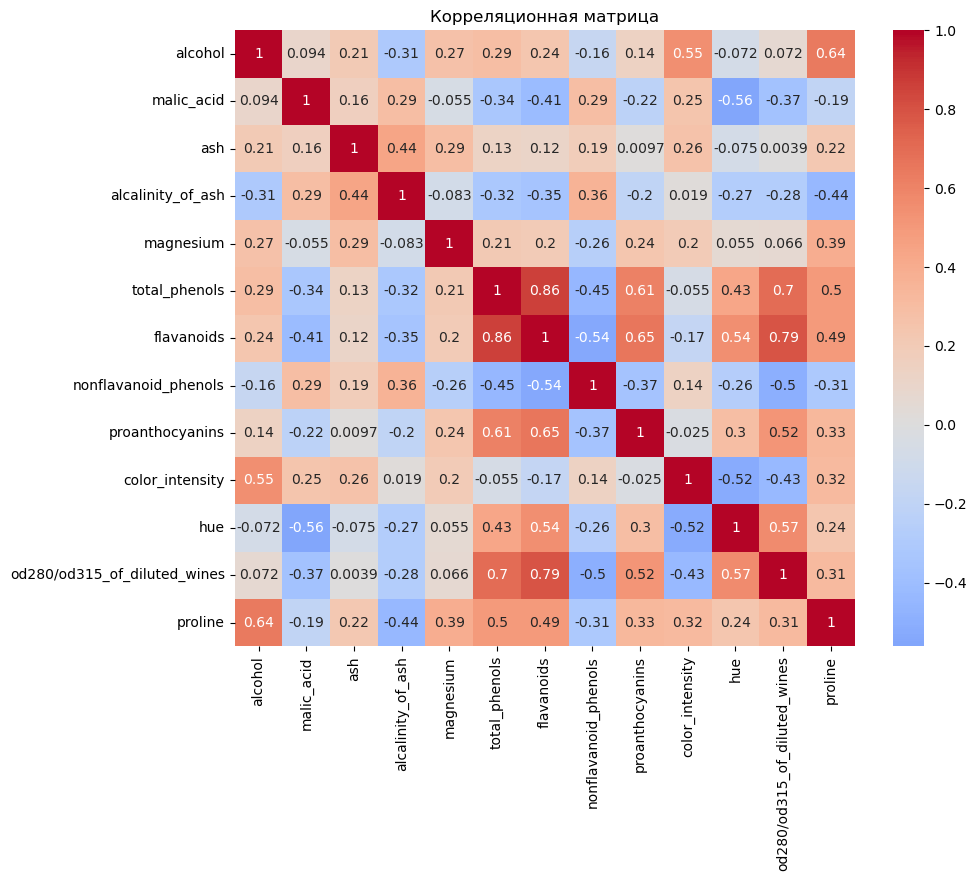

In [9]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

In [29]:
threshold = 0.6
# to_drop = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > threshold and correlation_matrix[column] < 1)]

to_drop = []

for first_column in correlation_matrix.columns:
     for second_column in correlation_matrix.columns:
         if first_column != second_column and not first_column in to_drop:
             if correlation_matrix[first_column][second_column] > threshold and correlation_matrix[first_column][second_column] < 1:
                 to_drop.append(first_column)

final_wine_dataset = dataset.drop(columns=to_drop, axis=1)
final_wine_dataset

,malic_acid,ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,color_intensity,hue
0,1.71,2.43,15.6,127.0,0.28,5.64,1.04
1,1.78,2.14,11.2,100.0,0.26,4.38,1.05
2,2.36,2.67,18.6,101.0,0.30,5.68,1.03
3,1.95,2.50,16.8,113.0,0.24,7.80,0.86
4,2.59,2.87,21.0,118.0,0.39,4.32,1.04
...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95.0,0.52,7.70,0.64
174,3.91,2.48,23.0,102.0,0.43,7.30,0.70
175,4.28,2.26,20.0,120.0,0.43,10.20,0.59
176,2.59,2.37,20.0,120.0,0.53,9.30,0.60


In [9]:
x = dataset
y = sklearn_dataset.target

train_input, test_input, train_output, test_output = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(train_input, train_output)

RandomForestRegressor()

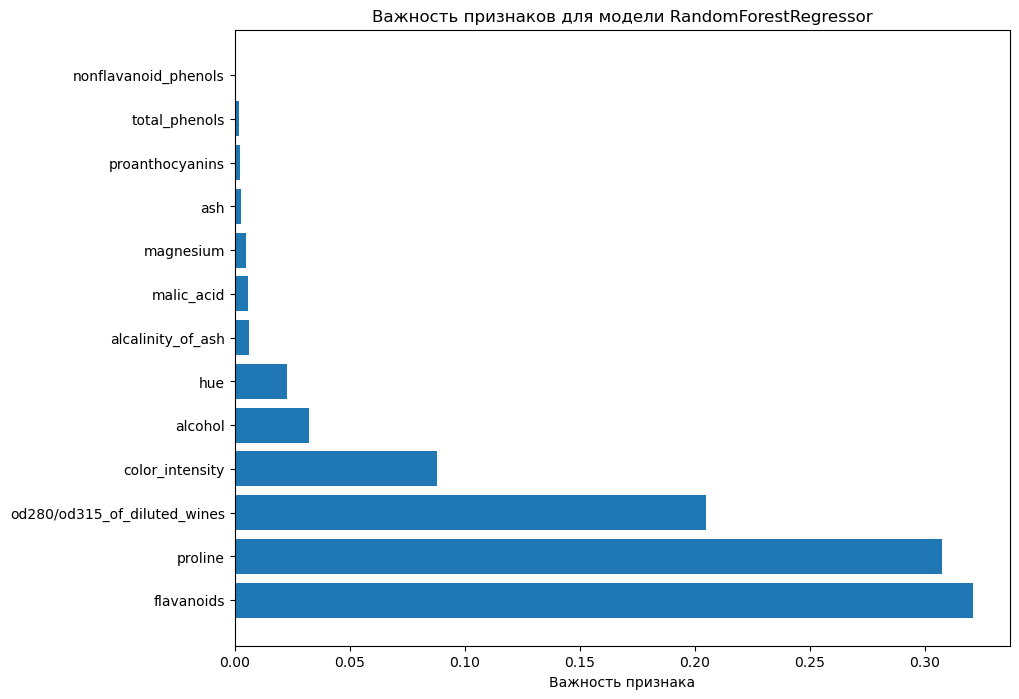

In [11]:
parameters_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': parameters_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признака')
plt.title('Важность признаков для модели RandomForestRegressor')
plt.show()

In [15]:
sklearn_california_dataset = datasets.fetch_california_housing()
california_dataset = pd.DataFrame(sklearn_california_dataset.data)
california_column_names = sklearn_california_dataset.feature_names

for i in range(len(california_column_names)):
    california_dataset = california_dataset.rename(columns={i: california_column_names[i]})

california_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
x = california_dataset
y = sklearn_california_dataset.target

In [19]:
pvalues_dict = {}

for column in x.columns:
    x_single_feature = sm.add_constant(x[[column]])
    model_sm = sm.OLS(y, x_single_feature).fit()
    
    feature_pvalue = model_sm.pvalues[column]
    
    pvalues_dict[column] = feature_pvalue
    
pvalues_df = pd.DataFrame(list(pvalues_dict.items()), columns=['Feature', 'p_value'])

pvalues_df

,Feature,p_value
0,MedInc,0.000000e+00
1,HouseAge,2.761861e-52
2,AveRooms,7.569242e-107
3,AveBedrms,1.912589e-11
4,Population,3.976308e-04
5,AveOccup,6.483442e-04
6,Latitude,2.939859e-96
7,Longitude,3.923322e-11


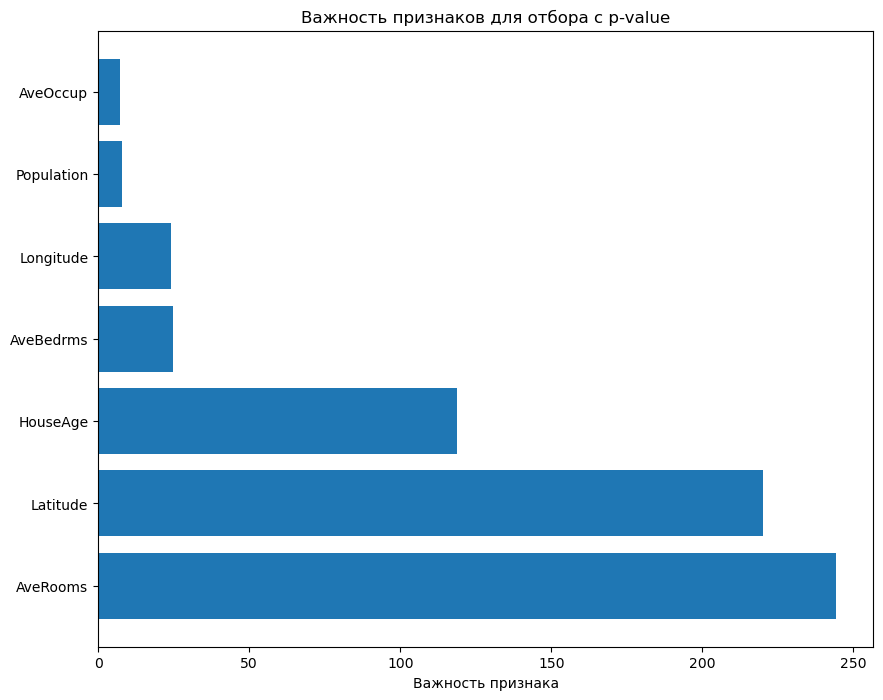

In [25]:
importances_list = []

for _, value in zip(pvalues_dict.keys(), list(pvalues_dict.values())):
    if value == 0:
        importance = np.inf 
        importances_list.append(importance)
        continue
    
    importance = -np.log(value) 
    importances_list.append(importance)


importance_results = dict(zip(list(pvalues_dict.keys()),importances_list))

final_results = pd.DataFrame(list(importance_results.items()),columns=['Feature','Importance'])

final_results = final_results.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(final_results['Feature'], final_results['Importance'])
plt.xlabel('Важность признака')
plt.title('Важность признаков для отбора с p-value')
plt.show()

In [38]:
iris_data = datasets.load_iris()
x = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [60]:
mi_scores = mutual_info_classif(x, y)

mi_scores_df = pd.DataFrame(iris_data.feature_names)
mi_scores_df['Importance'] = mi_scores
mi_scores_df.columns = ['Feature', 'Importance']
mi_scores_df

,Feature,Importance
0,sepal length (cm),0.487274
1,sepal width (cm),0.254905
2,petal length (cm),0.990895
3,petal width (cm),0.986510


In [66]:
model_lr = LinearRegression()
n_features_to_select = 4

rfe_selector = RFE(estimator=model_lr,
                   n_features_to_select=n_features_to_select)

rfe_selector.fit(x, y)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [68]:
rfe_results_df=pd.DataFrame({
    'Feature': iris_data.feature_names,
    'Selected': rfe_selector.support_,
    'Ranking': rfe_selector.ranking_
})

rfe_results_df

,Feature,Selected,Ranking
0,sepal length (cm),True,1
1,sepal width (cm),True,1
2,petal length (cm),True,1
3,petal width (cm),True,1


In [4]:
dataset = datasets.fetch_california_housing()
x, y = dataset.data, dataset.target
feature_names = dataset.feature_names

data = pd.DataFrame(x, columns=feature_names)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
train_input, test_input, train_output, test_output = train_test_split(
    x, y, test_size=0.2,
)

In [50]:
def evaluate_model(train_input, test_input, train_output, test_output):
    model = RandomForestRegressor(random_state=42)
    model.fit(train_input, train_output)
    pred_output = model.predict(test_input)

    mae = mean_absolute_error(test_output, pred_output)
    mean_target = test_output.mean()
    accuracy_percent = (1 - (mae / mean_target)) * 100
    
    return round(accuracy_percent, 2)

In [26]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(train_input, train_output)
importances = rf_model.feature_importances_
important_features_rf = np.argsort(importances)[-5:]
train_input_rf = train_input[:, important_features_rf]
test_input_rf = test_input[:, important_features_rf]
rf_score = evaluate_model(train_input_rf, test_input_rf, train_output, test_output)

In [28]:
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(train_input, train_output)
train_input_pvalue = selector.transform(train_input)
test_input_pvalue = selector.transform(test_input)
pvalue_score = evaluate_model(train_input_pvalue, test_input_pvalue, train_output, test_output)

In [30]:
mi = mutual_info_regression(train_input, train_output)
important_features_mi = np.argsort(mi)[-5:]
train_input_mi = train_input[:, important_features_mi]
test_input_mi = test_input[:, important_features_mi]
mi_score = evaluate_model(train_input_mi, test_input_mi, train_output, test_output)

In [32]:
rfe_model = LinearRegression()
rfe = RFE(estimator=rfe_model, n_features_to_select=5)
rfe.fit(train_input, train_output)
train_input_rfe = rfe.transform(train_input)
test_input_rfe = rfe.transform(test_input)
rfe_score = evaluate_model(train_input_rfe, test_input_rfe, train_output, test_output)

In [36]:
results = pd.DataFrame({
    'Метод': ['Random Forest', 'P-value', 'Mutual Information', 'RFE'],
    'Точность (%)': [rf_score, pvalue_score, mi_score, rfe_score]
})

results

,Метод,Точность (%)
0,Random Forest,84.27
1,P-value,84.37
2,Mutual Information,84.23
3,RFE,84.57
